# Notes for Adam

In the slider example in https://dash.plotly.com/dash-core-components/slider, Dash is missing in the imports

Weird behaviour for `animate = True` in `dcc.Graph` components, at least for versions < 2.6.0

=> demonstrate with `https://github.com/apdcode/plotly_curriculum/blob/main/DemoCircleRef_AnimationDemo_Spot1.py`, with `conda activate spot1`


# Demo for Adam

# Cell below:
# 1. Figure import
# 2. Figure data import
# 3. Data source (dataframe) import

- fantastic debugging discusion the last time
- watch expressions was new to me
- debugging and inspecting dataframes, figures and callback contect still feel... inefficient
- I feel it's better to use pickle() and inspect objects in JupyterLab
- But that too feels inefficient
- Typical workflow:
    - run without debugging
    - get an error message in the app
    - correct the error message and run again with ctrl+s
    - OR shut down app
    - run again with Start Debugging
    - Anyway: A LOT of restarting going on
- are there better ways that are unknow to me/us?
    - perhaps with PyCharm?
    - Or in VSCode Call Stack?
    - => I'd like to dive into this:
    - AND weird or even productive ways to set up attributes in app.run_server() like:
        - debug = True
        - dev_tools_props_check 
        - dev_tools_ui
- Community efforts were mentioned last time around
    - a possibility for a medium article?
    - if not, then SO or CF


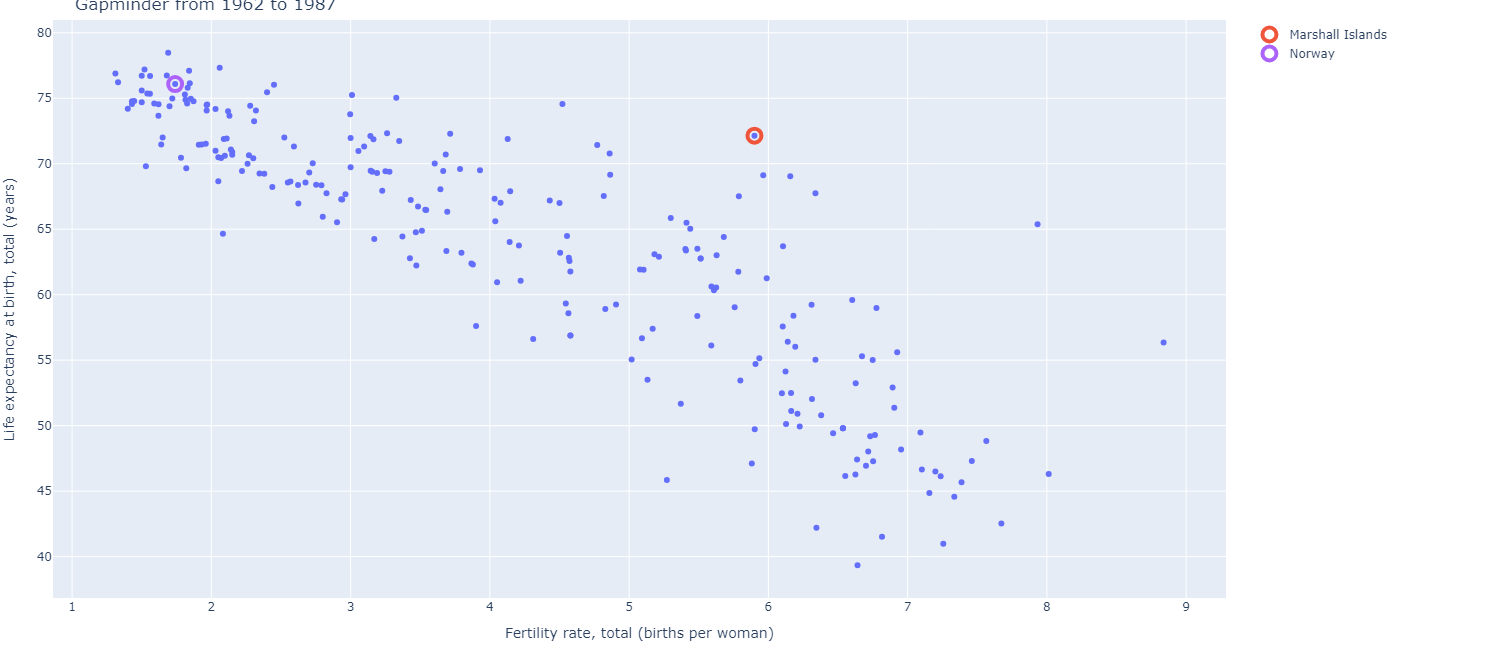

In [62]:
with shelve.open('C:\\repos\shelve\dash2\\figure_structure', 'r') as shelf_in:
    fig = shelf_in['figout']
    figdata = shelf_in['figdata']
    dfi = shelf_in['dfi']

    dff = shelf_in['dfout']
    ctx_inputs_list = shelf_in['ctx_inputs_list']
    ctx_outputs_list = shelf_in['ctx_outputs_list']

f = fig.full_figure_for_development(warn=False)
fig.show()


In [47]:
# inspect input dataframe
# dfi.info()
# dfi.shape
# dfi.dtypes
dfi.isnull().sum()

Country Name          0
Indicator Name        0
Year                  0
Value             11144
dtype: int64

In [50]:
# inspect output dataframe
# dff.info()
# dff.shape
# dfi.dtypes
# dfi.describe()
dff.isnull().sum()

Country Name         0
Indicator Name       0
Year                 0
Value             1354
dtype: int64

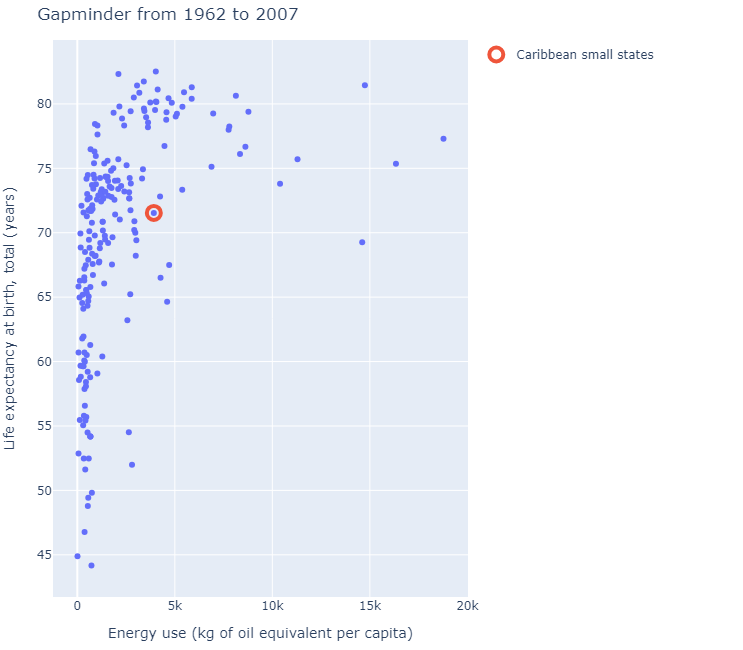

In [24]:
# fig.layout.annotations
# fig.layout.annotations = tuple()
fig.update_layout(title='Gapminder from 1962 to ' + str(ctx_inputs_list[-2]['value']))

fig.update_layout(margin=dict(t=40))#,paper_bgcolor="LightSteelBlue")

# fig.data[0].marker.color = 'red'
fig.show()

In [60]:
f = fig.full_figure_for_development
f

AttributeError: 'function' object has no attribute 'show'

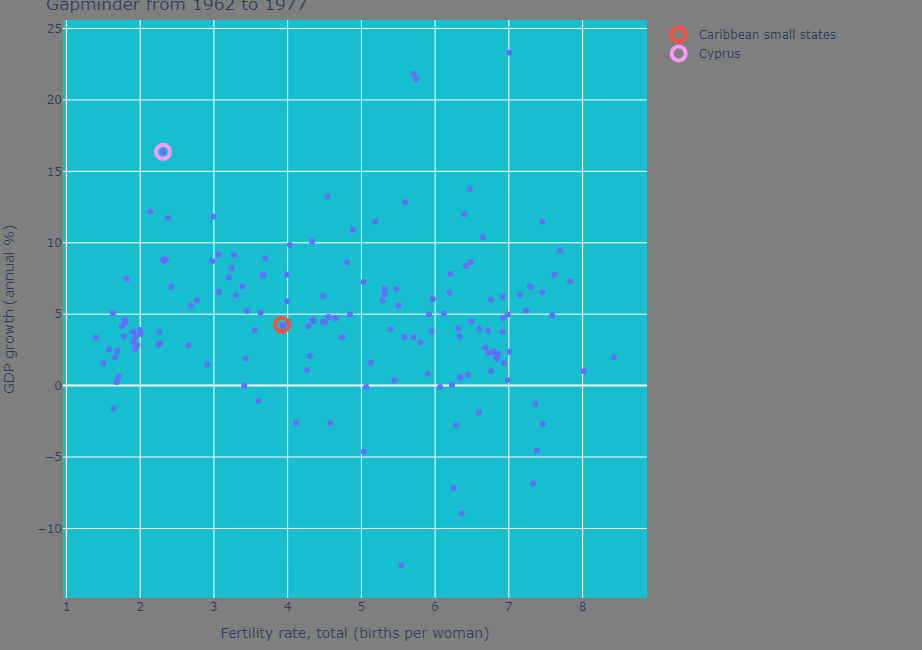

In [54]:
# find a combination that's pleasing to the eye
fig.update_layout(
    paper_bgcolor= 'rgb(127, 127, 127)',
    plot_bgcolor= 'rgb(23, 190, 207)')
fig.show()

In [ ]:
# go bananas
plotly_colors = ['rgb(31, 119, 180)',
 'rgb(255, 127, 14)',
 'rgb(44, 160, 44)',
 'rgb(214, 39, 40)',
 'rgb(148, 103, 189)',
 'rgb(140, 86, 75)',
 'rgb(227, 119, 194)',
 'rgb(127, 127, 127)',
 'rgb(188, 189, 34)',
 'rgb(23, 190, 207)'][:]

for c1 in plotly_colors:
    for c2 in plotly_colors:
        fig.update_layout(
            paper_bgcolor=c1,
            plot_bgcolor=c2)
        fig.show()


In [ ]:
config={
    'editable': True,
    'edits': {
        'shapePosition': True,
        'annotationPosition': True
    }

In [81]:
from itertools import count
counter = count(start = 0, step = 1)

for i in range(4):
    # print(next(counter))
    
    # print(next(counter))
    print('is =', counter.__reduce__()[1][0])#, next(counter))
    print('triggered first = ', next(counter),)
    print('triggered second = ', next(counter),)
    print('is =', counter.__reduce__()[1][0])#, next(counter))
    print('is =', counter.__reduce__()[1][0])#, next(counter))
    print('is =', counter.__reduce__()[1][0])#, next(counter))
    # print(next(counter))
    # print(next(counter))
    
    print("--")

is = 0
triggered first =  0
triggered second =  1
is = 2
is = 2
is = 2
--
is = 2
triggered first =  2
triggered second =  3
is = 4
is = 4
is = 4
--
is = 4
triggered first =  4
triggered second =  5
is = 6
is = 6
is = 6
--
is = 6
triggered first =  6
triggered second =  7
is = 8
is = 8
is = 8
--


In [ ]:
import dash_bootstrap_components as dbc

In [ ]:
dcc.Checklist(id="x-variable",
                            #options=[{"label": i, "value": col} for i, col in enumerate(modeller_alle)],

                options=[{"label": col + ' ', "value": col} for col in df.columns],
                #options=[{"label": col, "value": col} for col in df.columns],
                value=[df.columns[1]],
                labelStyle={'display': 'inline-block', 'width': '12em', 'line-height':'0.5em'},
                style={'width':'100%'}
                            #clearable=False,
                            #multi = True
                        )

# Cell below:
# 1. Callback context import

# dir(ctx) returns:
['args_grouping', 'inputs', 'inputs_list', 'outputs_grouping', 'outputs_list', 'record_timing', 'response', 'states', 'states_list', 'triggered', 'triggered_id', 'triggered_prop_ids', 'using_args_grouping', 'using_outputs_grouping']


In [2]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import dbm.dumb
import shelve
from dash import Dash, html, dcc

with shelve.open('C:\\repos\shelve\dash2\\callback_context', 'r') as shelf_in:
    # for key in shelf_in.keys():
        # print(repr(key), repr(shelf_in[key]))
        # print(repr(key))
    # fig = go.Figure(shelf_in['figout'])
    # ctx_inputs = shelf_in['ctx_inputs']
    ctx_inputs_list = shelf_in['ctx_inputs_list']
    ctx_outputs_list = shelf_in['ctx_outputs_list']
    ctx_triggered_id = shelf_in['ctx_triggered_id']
    # figdata = shelf_in['figdata']
    # df = pd.read_pickle(shelf_in['dfout'])
    # dff = shelf_in['dfout']

# print("ctx_inputs_list:")
# print("================")
# print(ctx_inputs_list)
# print("ctc_outputs_list:")
print("ctx_inputs_list")
print("=================")
print(ctx_inputs_list)
# print("ctx_triggered_id:")     
# print("=======================")
# print(ctx_inputs_list)

ctx_inputs_list
[{'id': 'crossfilter-indicator-scatter', 'property': 'clickData'}, {'id': 'dd1_fokus_land', 'property': 'value', 'value': None}]


In [52]:
ctx_inputs_list

[{'id': 'crossfilter-indicator-scatter', 'property': 'clickData', 'value': {}},
 {'id': 'dd1_fokus_land',
  'property': 'value',
  'value': ['Late-demographic dividend']}]

In [41]:
ctx_inputs_list[1]

{'id': 'dd1_fokus_land',
 'property': 'value',
 'value': ['Caribbean small states',
  'Nepal',
  'Middle East & North Africa',
  'Israel']}